In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [ ]:
df=pd.read_csv("/content/height-weight.csv")

In [ ]:
df.shape

(23, 2)

In [ ]:
df.head()

,Weight,Height
0,45,120
1,58,135
2,48,123
3,60,145
4,70,160


Text(0, 0.5, 'Height')

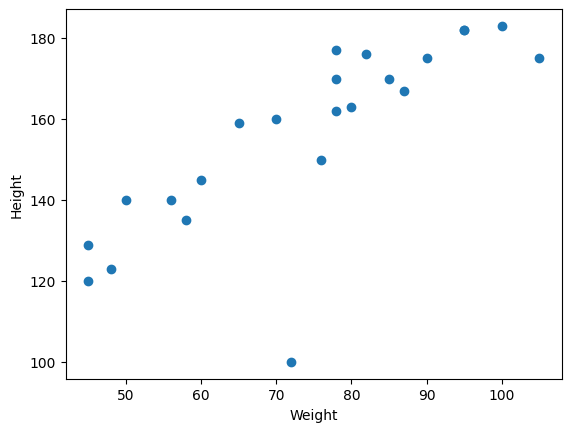

In [ ]:
#scatter plot
plt.scatter(df['Weight'],df['Height'])
plt.xlabel("Weight")
plt.ylabel("Height")

In [ ]:
##correlation
df.corr()

,Weight,Height
Weight,1.000000,0.802449
Height,0.802449,1.000000


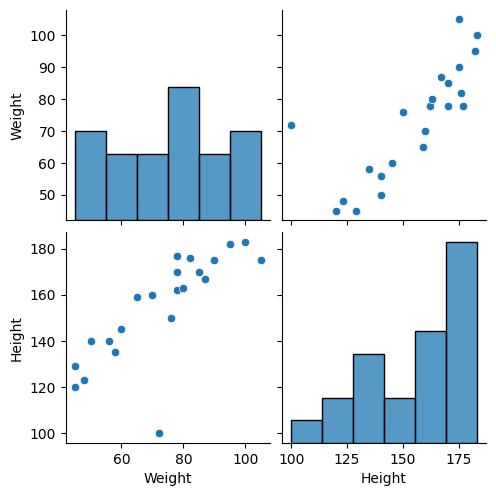

In [ ]:


#seaborn for visualization
import seaborn as sns
sns.pairplot(df)

In [ ]:
##Independent and dependent features
X=df[['Weight']]##Independent Feature should be dataframe or two dimensional array
Y=df['Height']#variable can be in series or one dimensional array


In [ ]:
# Train Test Split
from sklearn.model_selection import train_test_split


In [ ]:
X_train,X_test,Y_train,y_test=train_test_split(X,Y,test_size=0.25,random_state=42)

In [ ]:

##Standardization
from sklearn.preprocessing import StandardScaler

In [ ]:
scaler=StandardScaler()
X_train=scaler.fit_transform(X_train)

In [ ]:

X_test=scaler.transform(X_test)


In [ ]:
#Apply Simple Linear Regression
from sklearn.linear_model import LinearRegression
regression=LinearRegression(n_jobs=-1)


In [ ]:
regression.fit(X_train,Y_train)

LinearRegression(n_jobs=-1)

In [ ]:
print("coefficient or slope:",regression.coef_)

coefficient or slope: [17.39882298]


In [ ]:
print("intercept:",regression.intercept_)

intercept: 152.94117647058823


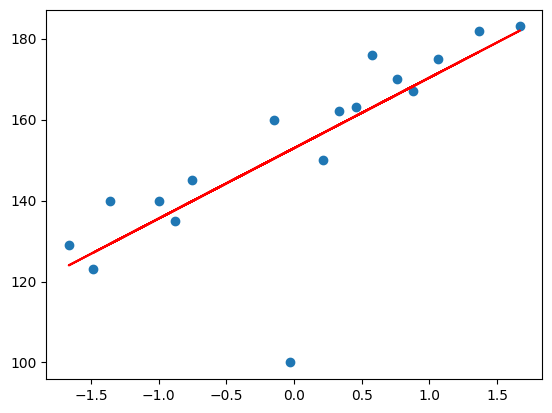

In [ ]:
##plot Training data plot best fit line
plt.scatter(X_train,Y_train)
plt.plot(X_train,regression.predict(X_train),color='red')

In [ ]:
##Prediction for test data
Y_pred=regression.predict(X_test)

In [ ]:
#Performance Metrics
from sklearn.metrics import mean_squared_error,mean_absolute_error

In [ ]:
mse = mean_squared_error(y_test,Y_pred)

In [ ]:
rmse=mse**0.5

In [ ]:
mae=mean_absolute_error(y_test,Y_pred)

In [ ]:
print("Mean Squared Error:",mse)
print("Mean Absolute Error:",mae)
print("Root Mean Squared Error:",rmse)

Mean Squared Error: 141.0416484560298
Mean Absolute Error: 10.820202841130358
Root Mean Squared Error: 11.87609567391699


In [ ]:
from sklearn.metrics import r2_score

In [ ]:
score=r2_score(y_test,Y_pred)
print(score)

0.6758698152303177


In [ ]:
#display adjusted R-squared
1 - (1-score)*(len(Y_train)-1)/(len(Y_train)-X_train.shape[1]-1)

0.6542611362456723

In [ ]:
## OLS Linear Regression
import statsmodels.api as sm


In [ ]:
model=sm.OLS(Y_train,X_train).fit()

In [ ]:
predictedvalues=model.predict(X_test)
print(predictedvalues)

[  5.82811291   5.82811291 -28.95456094  23.74646004  -7.87415255
  34.28666424]


In [ ]:
print(model.summary())

                                 OLS Regression Results                                
Dep. Variable:                 Height   R-squared (uncentered):                   0.013
Model:                            OLS   Adj. R-squared (uncentered):             -0.049
Method:                 Least Squares   F-statistic:                             0.2053
Date:                Fri, 16 Aug 2024   Prob (F-statistic):                       0.657
Time:                        15:35:58   Log-Likelihood:                         -109.70
No. Observations:                  17   AIC:                                      221.4
Df Residuals:                      16   BIC:                                      222.2
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

/usr/local/lib/python3.10/dist-packages/scipy/stats/_axis_nan_policy.py:531: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=17
  res = hypotest_fun_out(*samples, **kwds)


In [ ]:
weight=int(input("Enter a weight"))
print(regression.predict(scaler.transform([[weight]])))

Enter a weight 72
[152.44516686]


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
